In [3]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../src/')

In [10]:
from data.create_dataset import *
from visualization.visualize import *
from modelling import ols,ridge
from model_evaluation.metrics import *
from processing.data_preprocessing import *
from utils.utils import *
import numpy as np
from sklearn.model_selection import  train_test_split

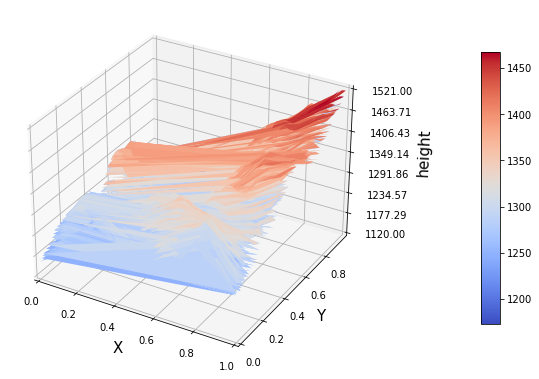

In [87]:
X, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif',degree=2)
X_train, X_test, z_train, z_test = train_test_split(X,z, test_size=0.2)
lmb = 0.01
beta_ridge = ridge.fit_beta(X_train,z_train,lmb)
z_pred = ridge.predict(X_test,beta_ridge)
surf = plot_surf_from_X(X_train,z_train)

In [8]:
beta_ridge.shape

(66, 1)

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import Ridge, LinearRegression


z_ssScaler = StandardScaler()
z_mmScaler = MinMaxScaler()
X_ssScaler = StandardScaler()
X_mmScaler = MinMaxScaler()

0.0

In [88]:
linreg = LinearRegression(fit_intercept=False).fit(X_train,z_train)
beta_ols = ols.fit_beta(X_train,z_train)
beta_ols2 = ols.fit_beta(X_train,z_train,fit_intercept=False)
np.column_stack((linreg.coef_.T,beta_ols,beta_ols2))

array([[1281.88897516, 1281.88897516, 1281.88897516],
       [ -64.65063572,  -64.65063572,  -64.65063572],
       [-117.28436077, -117.28436077, -117.28436077],
       [  94.86312476,   94.86312476,   94.86312476],
       [ 316.34912841,  316.34912841,  316.34912841],
       [ -14.78118031,  -14.78118031,  -14.78118031]])

In [90]:
X_test_centered = X_test - np.mean(X_train,axis=0)
np.column_stack((ols.predict(X_test,beta_ols),X_test@beta_ols2))


array([[1423.92078064, 1423.92078064],
       [1368.84477623, 1368.84477623],
       [1271.74807319, 1271.74807319],
       ...,
       [1299.61955899, 1299.61955899],
       [1255.35264274, 1255.35264274],
       [1288.18728049, 1288.18728049]])

In [47]:
linreg.intercept_

array([1202.09985105])

In [13]:
X_train_scl = X_mmScaler.fit_transform(X_train)
X_test_scl = X_mmScaler.transform(X_test)

z_train_scl = z_mmScaler.fit_transform(z_train)
z_test_scl = z_mmScaler.transform(z_test)


In [14]:
beta_scl = ridge.fit_beta(X_train_scl, z_train_scl, lmb, fit_intercept=False)
rid = Ridge(alpha=lmb, fit_intercept=False).fit(X_train_scl, z_train_scl)
print(rid.intercept_)
np.column_stack((rid.coef_.T,beta_scl))

0.0


array([[ 0.        ,  0.        ],
       [ 2.29283553,  2.29283553],
       [ 1.86153918,  1.86153918],
       [-4.39331714, -4.39331714],
       [-4.36088284, -4.36088284],
       [-4.87110485, -4.87110485],
       [ 2.28527459,  2.28527459],
       [ 4.61200532,  4.61200532],
       [-0.79120354, -0.79120354],
       [ 5.14863526,  5.14863526],
       [ 1.89902369,  1.89902369],
       [ 1.08355599,  1.08355599],
       [ 2.6573658 ,  2.6573658 ],
       [ 0.61491098,  0.61491098],
       [ 1.73594083,  1.73594083],
       [ 0.12154949,  0.12154949],
       [-1.86370093, -1.86370093],
       [ 1.78826416,  1.78826416],
       [-0.40790633, -0.40790634],
       [ 0.55199939,  0.55199939],
       [-2.43634683, -2.43634683],
       [-0.99617724, -0.99617724],
       [-2.2328616 , -2.2328616 ],
       [ 1.24849443,  1.24849443],
       [-1.48735021, -1.48735021],
       [-1.61203894, -1.61203894],
       [ 1.01079315,  1.01079316],
       [-2.9560242 , -2.9560242 ],
       [-1.18279752,

In [56]:
z_pred_scl = ridge.predict(X_test_scl,beta_scl)

z_pred_sk = rid.predict(X_test_scl)

np.column_stack((z_pred_sk,z_pred_scl))

array([[0.33254075, 0.33254075],
       [0.55794409, 0.55794409],
       [0.36425402, 0.36425402],
       ...,
       [0.15049379, 0.15049379],
       [0.84205311, 0.84205311],
       [0.4870248 , 0.4870248 ]])

Splitting a columnstack seem to work. I.e when concatenating and sorting we end up with the same surface. However, the sorting might fix things(if things are wrong)?

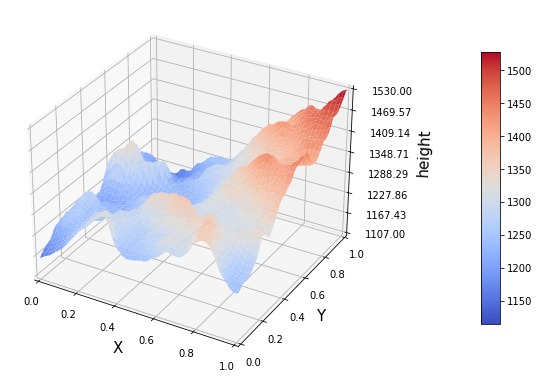

In [69]:
xy, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif')
xy_train, xy_test, z_train, z_test = train_test_split(xy,z, test_size=0.2)
xy_ = np.concatenate((xy_train,xy_test),axis=0)
z_ = np.concatenate((z_train,z_test),axis=0)
xy_, z_ = sort_surface(xy_,z_)
surf = plot_surf(xy_[:,0],xy_[:,1],z_)

Lets test by splitting with columnstack and design matrix with same random state and compare. At least z_train is equal in both cases.

In [71]:
X = create_poly_design_matrix(xy[:,0],xy[:,1])

xy_train, xy_test, z_train, z_test = train_test_split(xy,z, test_size=0.2, random_state = 42)
X_train, X_test, z_train2, z_test2 = train_test_split(X,z, test_size=0.2, random_state = 42)
z_train - z_train2

Array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int16)

...and xy_train and X_train are equal. So yes, splitting columnstack do work.

In [74]:
X_train[:,1:3] - xy_train

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

Gonna make the MSE curves now with different degrees.

(10000, 2)


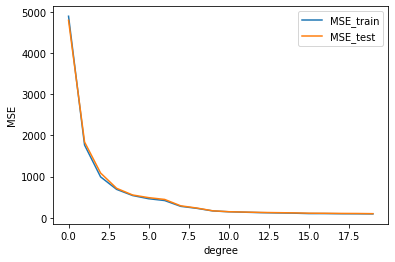

In [100]:
max_degree = 20
MSE_train = np.zeros(max_degree)
MSE_test = np.zeros(max_degree)
xy, z = create_dataset('../data/raw/SRTM_data_Norway_1.tif')
xy_train, xy_test, z_train, z_trest = train_test_split(xy,z,test_size=0.2, random_state = 42)
X = create_poly_design_matrix(xy)

for degree in range(max_degree):
    X_train = create_poly_design_matrix(xy_train,degree=degree)
    X_test = create_poly_design_matrix(xy_test,degree=degree)
    z_tilde,z_pred = ols.fit_predict(X_train,z_train, X_test)
    
    MSE_train[degree] = MSE(z_train,z_tilde)
    MSE_test[degree] = MSE(z_test,z_pred)



plt.figure()
plt.plot(MSE_train, label = 'MSE_train')
plt.plot(MSE_test, label = 'MSE_test')


plt.xlabel('degree')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [88]:
a = None
if(a!=None):
    print(1)